In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from dynadojo.systems.lv import CompetitiveLVSystem, PreyPredatorSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lv import plot

/Users/ngan/playground/DynaDojo/src/dynadojo/utils/lv.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


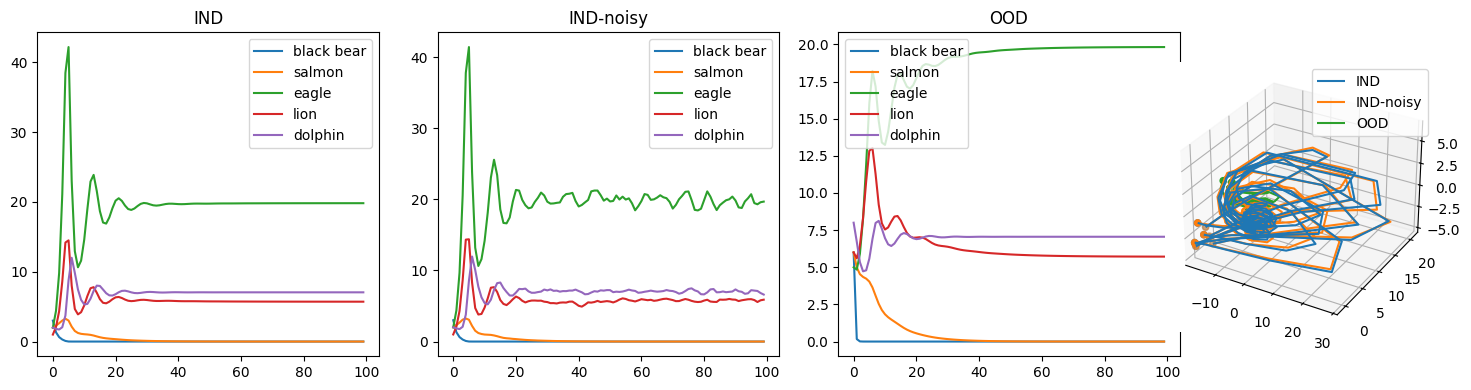

In [4]:
# Prey Predator Lotka Volterra, which can often show different dynamics in out-of-distribution data
latent_dim = [5]
embed_dim = 5
n = 10
timesteps = 100
for dim in latent_dim:
    system = SystemChecker(PreyPredatorSystem(dim, embed_dim))

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    plot([x,x_noisy,y], target_dim=min(dim, 3), specieslabels=["black bear", "salmon", "eagle", "lion", "dolphin", "tiger"], labels=["IND", "IND-noisy", "OOD"], max_lines=100)

/Users/ngan/playground/DynaDojo/src/dynadojo/utils/lv.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


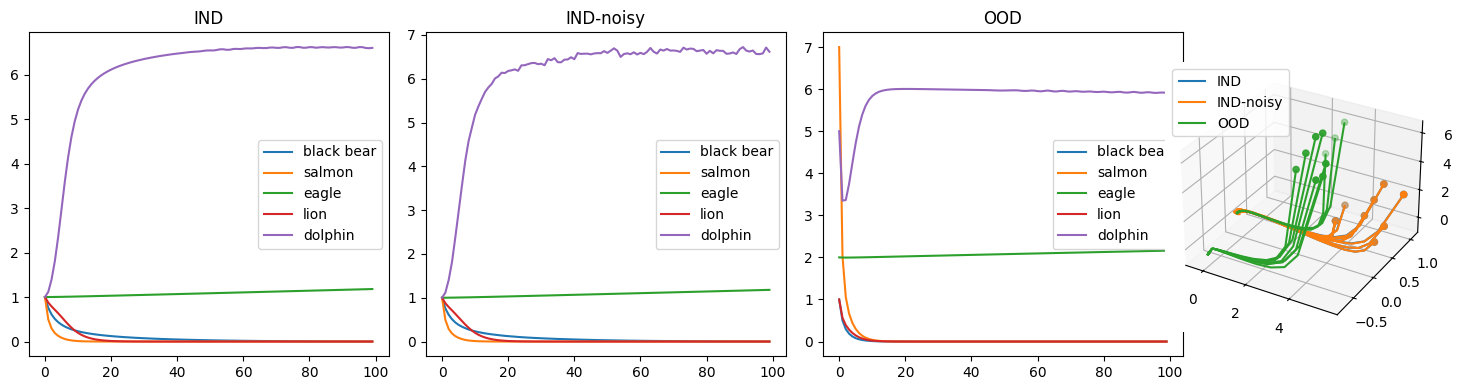

In [3]:
# Competitive Lotka Volterra, which can often show different dynamics in out-of-distribution data
latent_dim = [5]
embed_dim = 5
n = 10
timesteps = 100
for dim in latent_dim:
    system = SystemChecker(CompetitiveLVSystem(dim, embed_dim))

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    plot([x,x_noisy,y], target_dim=3, specieslabels=["black bear", "salmon", "eagle", "lion", "dolphin", "tiger"], labels=["IND", "IND-noisy", "OOD"], max_lines=100)